# DAX to Manipulate Table

## ALLCOLUMNS

__It is used to create a table with calculated columns from columns within the same table__

> **Construct count measure which makes it easy to calculate number of cities by country**

countrycount = DISTINCTCOUNT(Customer[City])

> **Another way of producing disaggregates is to use SUMX with RELATEDTABLE and using CALCULATE ALONG with appropriate filter to count disaggregation value which in this case is CustomerKey

SUMX(RELATEDTABLE(Sales),Sales[Sales Amount])

CALCULATE(COUNT(Sales[CustomerKey]),ALLSELECTED(Sales[CustomerKey])

> **Not that simple aggregation functions will produce totals: see total city count and sotal sales. Not that even SUMX without relatedtable produces the same result**

DISTINCTCOUNT(Customer[City])

SUM(Sales[Sales Amount]) = SUMX(Sales,Sales[Sales Amount])

> **Create table with list of countries and number of cities in each country vs total cities in table plus sales and total sales**

customers_by_country = 

ADDCOLUMNS(
        
        VALUES(Customer[Country-Region]),

        "Number of Cities",[countrycount],

        "Total Cities", DISTINCTCOUNT(Customer[City]),

        "Sales",SUMX(RELATEDTABLE(Sales),Sales[Sales Amount]),

        "Sales, Total",SUM(Sales[Sales Amount]),

        "number of sales", CALCULATE(COUNT(Sales[CustomerKey]),ALLSELECTED(Sales[CustomerKey]))
 )

|Country-Region 	|Number of Cities   |Total Cities	|Sales  	|Sales, Total    |number of sales|
|-------------------|-------------------|---------------|-----------|----------------|---------------|
|[Not Applicable]   |1	                |270        	|   80450597|       109809274|	    60855|
|Australia	        |39	                |270	        |    9061001|	    109809274|	    13345|
|United States	    |112	            |270	        |    9389790|	    109809274|	    21344|
|Canada	            |18	                |270	        |    1977845|	    109809274|	    7620|
|Germany	        |34	                |270	        |    2894312|	    109809274|	    5625|
|United Kingdom	    |34	                |270	        |    3391712|	    109809274|	    6906|
|France	            |33	                |270	        |    2644018|	    109809274|  	5558|

# ADDMISSINGITEMS
> This function is used to output all items including those with missing elements

SUMMARIZECOLUMNS( 
    
    'Sales'[CustomerId], 
    
    "Total Qty", SUM ( Sales[TotalQty] )
)

|CustomerId	|TotalQty|
|-----------|--------|
|A       	|5|
|B       	|3|
|C       	|3|
|E       	|2|

On the other hand, this code below outputs all values including thosewith missing values:

EVALUATE

ADDMISSINGITEMS (

    'Sales'[CustomerId],

    SUMMARIZECOLUMNS( 

        'Sales'[CustomerId],

        "Total Qty", SUM ( Sales[TotalQty] )

    ),

    'Sales'[CustomerId]
)

|CustomerId	|TotalQty|
|-----------|--------|
|A       	|5|
|B       	|3|
|C       	|3|
|D          | |
|E       	|2|
|F          | |

# Crossjoin

> A cross product of tables is produced

> Syntax: CROSSJOIN( Colors, Stationery )

![Alt text](Crossjoin.png)

# GROUPBY and CURRENTGROUP
> __Example 1: Summarizing a table using group by in DAX for one variable__


Customer_category_by_average_sales = 

VAR average_sales=AVERAGEX(DimCustomer,[Sales_Amount])

VAR taggedcustomers =

        SUMMARIZECOLUMNS(DimCustomer[CustomerKey],

        "Customer Category",IF([Sales_Amount]>=average_sales,"above average","below average"))

VAR RESULT =

        GROUPBY(taggedcustomers,

        [Customer Category],

        "# of Customers", COUNTX(CURRENTGROUP(),1))
    
RETURN RESULT

> __Example 2: Summarizing a table by combination of two columns (variables)__

product_by_customer = 

VAR customer_product=

		SUMMARIZE
			(FactOnlineSales,

			FactOnlineSales[CustomerKey],

			FactOnlineSales[ProductKey])

VAR product_count_by_customer=
	
		GROUPBY
			(customer_product,
			
			FactOnlineSales[CustomerKey],
			
			"# Products",COUNTX(CURRENTGROUP(),1) )
	
RETURN product_count_by_customer  

# __Note that only measures work with SUMMARIZE, SUMMARIZECOLUMNS, and ADDCOLUMNS when disaggregate values are needed.__

# SUMMARIZECOLUMNS and TREATAS

Syntax: SUMMARIZECOLUMNS( <groupBy_columnName> , < groupBy_columnName >, [<filter_Table>], [<variable_name>, <calculated_measure>])

> SUMMARIZECOLUMNS will generate a table from columns on same or different tables which have a relation

> TREATAS will filter new table using column categories. Filter used in TREATAS don't have to be present as column.

__DAX__

sales_and_quanity_by_brand_filtered_year = 

        SUMMARIZECOLUMNS(

            DimProduct[BrandName],

            DimDate[CalendarYearLabel],

            DimProduct[ColorName],

            TREATAS({"Year 2008", "Year 2009"},DimDate[CalendarYearLabel]),

            TREATAS({"Red","Blue"},DimProduct[ColorName]),

            "Amount",FactOnlineSales[Sales_Amount],
            
            "Qty",SUM(FactOnlineSales[SalesQuantity])
        )



__DAX STUDIO__

EVALUATE 

    SUMMARIZECOLUMNS(

        DimProduct[BrandName],

        DimDate[CalendarYearLabel],

        DimProduct[ColorName],

        TREATAS({"Year 2008", "Year 2009"},DimDate[CalendarYearLabel]),

        TREATAS({"Red","Blue"},DimProduct[ColorName]),

        "Amount",FactOnlineSales[Sales_Amount],

        "Qty",SUM(FactOnlineSales[SalesQuantity])
    )
        
    ORDER BY "AMOUNT"

# SUMMARIZE

> SUMMURIZE needs name of table from which the group by column is coming from. The calculation column can come from any table while SUMMURUZECOLUMNS needs only column names

Sales by Colour = 

    SUMMARIZE(
        
        DimProduct,
        
        DimProduct[ColorName],
        
        "Sales Amount", FactOnlineSales[Sales_Amount]
        
        )

Sales by Colour Filter = 

        SUMMARIZE(
        
                FILTER( DimProduct,
                        
                        DimProduct[ColorName]="Azure"),
                        
                DimProduct[ColorName],
                
                "Sales Amount", FactOnlineSales[Sales_Amount]
                
                )

# SUMMARIZE with filtering for a numerical column

Sales by Colour by number of cars = 

    SUMMARIZE(
        
        CALCULATETABLE(
            
            DimProduct,
            
            VALUES(DimProduct[ColorName]
            
            ),
            
            DimProductCategory[ProductCategoryKey]>3
            ),
            
            DimProduct[ColorName],
            
            "Sales Amount", FactOnlineSales[Sales_Amount]
            
        )

# SELECTCOLUMNS

> Returns a table with selected columns from the table and new columns specified by the DAX expressions.
> It doesn't summarize or aggregate numeric values it just presents it row by row.
> It may be useful to look at table outputs that you would normally see by dragging and droping columns using Table visualization.

> Note:
 
> __It requires single quotation to refer to table names when writing Dax Studio and Dax Codes with SELECTCOLUMNS like this: 'DimCustomer' 
> and 'DimCustomer'[SalesAmount]__

Example
For the following table named Customer:

|Country	|State	|Count	|Total|
|-----------|-------|-------|-----|
|IND	    |JK	    |20	    |800|
|IND	    |MH	    |25	    |1000|
|IND	    |WB	    |10	    |900|
|USA	    |CA	    |5	    |500|
|USA	    |WA	    |10	    |900|

The following Dax Studio:

    SELECTCOLUMNS(
        
        'Customer', 
        
        "Country, State", 
        
        'Customer'[Country]&", "&'Customer'[State])

will return:

|Country, State|
|--------------|
|IND, JK|
|IND, MH|
|IND, WB|
|USA, CA|
|USA, WA|

SELECTCOLUMN in Dax can display only a single column at a time and needs SELECTEDVALUE.

    salesbyeducationstatus = 
        
        SELECTCOLUMNS(
        
            'DimCustomer',
        
            "Education",SELECTEDVALUE('DimCustomer'[MaritalStatus])
        
            )

###  SELECTCOLUMNS is an iterator that returns a selection of
###  columns / expressions evaluated in the row context during
###  the iteration over its first parameter. It is possible to include multople columns in DAX Studio

    EVALUATE

        SELECTCOLUMNS(

            TOPN(10, 'DimCustomer'),
            
            "Gender",'DimCustomer'[Gender],
            
            "Education",'DimCustomer'[Education],
            
            "Sales",'FactOnlineSales'[Sales_Amount]
            
            )

## Output

|Gender |Education          |Sales|
|-------|-------------------|-----|
|M	    |Partial College	|21735.3453|
|M	    |Partial College	|25815.0621|
|F	    |Partial College	|24927.5491|
|F	    |Partial College	|24921.0643|
|M	    |Partial College	|24097.7882|
|F	    |Partial College	|25264.0861|
|M	    |Partial College	|24859.1228|
|F	    |Partial College	|28201.5002|
|M	    |Partial College	|30228.4441|


# SUBSTITUTEWITHINDEX

It is used to order results in a table by specifing or numbering rows.

    DEFINE
        VAR R = 
        
        SUMMARIZECOLUMNS (

            'Product'[Brand],

            'Date[Calendar Year]',

            TREATAS({"Contoso", "Fabriakm"}), 

            "Amt", [Sales Amount]
        )

        VAR C = 
            
            SUMMARIZE (Sales, 'Date'[Calendar Year])

        VAR RESULT = 

            SUBSTITUTEWITHINDEX (R, "Column #", C, 'Date'[Calendar Year], Asc)

        EVALUATE

            RESULT

# ROLLUPGROUP, ISSUBTOTAL, and IGNORE

Source Table

    Sales_continent_colour = SUMMARIZECOLUMNS(
                        'DimGeography'[ContinentName],
                        DimProduct[StockTypeName],
                        "Sales",[sales_amount])


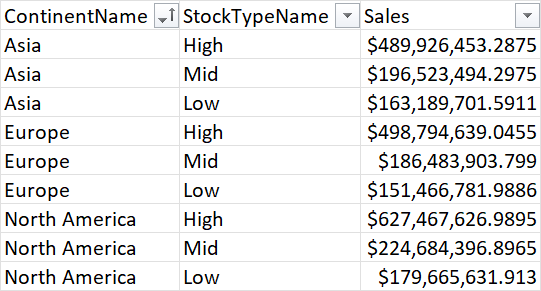

Final table with subtotal and grandtotal values

    Source Table with Subtotals = SUMMARIZE(
        Sales_continent_colour,ROLLUPGROUP(Sales_continent_colour[ContinentName],Sales_continent_colour[StockTypeName]),
        "Sales",SUM(Sales_continent_colour[Sales]),
        "IS_type_subtotal",ISSUBTOTAL(Sales_continent_colour[StockTypeName]),
        "IS_continent_subtotal",ISSUBTOTAL(Sales_continent_colour[ContinentName]))

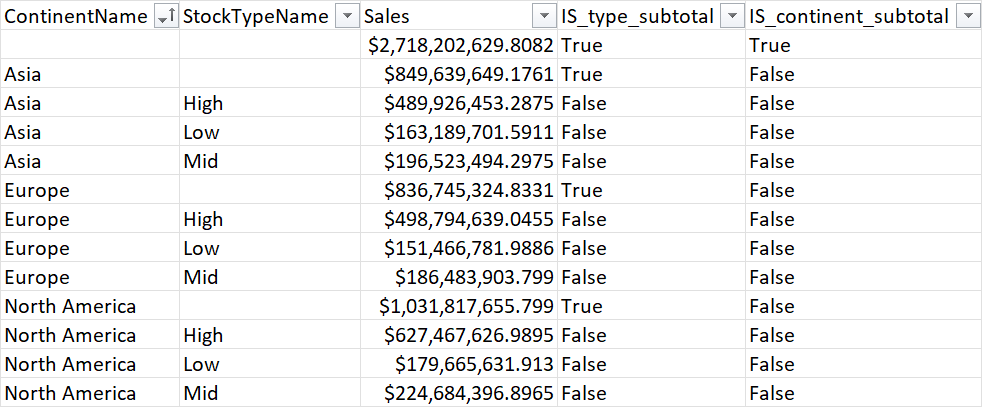

> Note: If we add ROLLUP before ROLLUPGROUP, the subtotal will disappear with the exception of grand total

> Using IGNORE([Sales_amount]) will allow categories with blank sales value to appear in output table.

# ROW

> Presents a table in a single row

    Critical Sales values = 
        ROW("Internet Total Sales (USD)", SUM(FactOnlineSales[SalesAmount]),  
         "Resellers Total Sales (USD)", SUM(Sales[SalesAmount]))

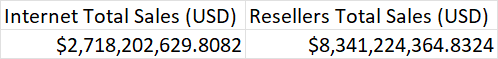

# GENERATE

> Cross ptoduct of two tables

# EXCEPT

> Returns the rows of the first table in the expression which do not appear in the second table.

Eg: TABLE 1={'A', 'B'}, TABLE 2={'B', 'C'}

EXCEPT([TABLE 1], [TABLE 2]) = 'A'